<a href="https://colab.research.google.com/github/Anshuman22coder/ML-projects/blob/main/Churn_Modelling_Deep_Learning_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 54.9 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow

In [4]:
!python --version


Python 3.11.11


In [5]:
!pip install tensorflow==2.18.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 74.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.1
    Uninstalling ml_dtypes-0.5.1:
      Successfully uninstalled ml_dtypes-0.5.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0


In [6]:
!pip install --upgrade tensorflow-text tf-keras


INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.


In [7]:
import tensorflow as tf
print(tf.__version__)  # Should print 2.19.0 or 2.18.0 based on your fix


2.18.0


In [8]:
# import basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
df=pd.read_csv("/content/Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
# divide the dataset into independent and depenedent features
X=df.iloc[:,3:13] # till the estimated salary excluding name and rowno and customerid and excited columns..
Y=df.iloc[:,13]
print(Y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [26]:
# fetaure eginering
# we are doing one hot encoding here..
geography=pd.get_dummies(X["Geography"],drop_first=True)  #means if spain , france and gernamny are the columns then dropping on column will still display the actual city_name as 00 means france if france is dropped
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [34]:
#concatenate these varibales with dataframe
X.drop(["Geography","Gender"],axis=1,inplace=True)  # inplace=True means we are doing all these in the dataframe only

KeyError: "['Geography', 'Gender'] not found in axis"

In [36]:
X=pd.concat([X,geography,gender],axis=1)  # axis=1 means column wise conactenation

In [39]:
#splitting the datset into Training and test set split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [40]:
#feature_Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [44]:
X_train.shape

(8000, 11)

In [46]:
#creation of ANN
from tensorflow.keras.models import Sequential  # means we can use forward and backward propagation
from tensorflow.keras.layers import Dense  # nodes and layers ..
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU   #activation fxns
from tensorflow.keras.layers import Dropout   # regulariaztion for preventing overfitting .. deactivating nodes ,,0.3 dropout means ,, we will deactivate 30% nodes..in each layer..

In [47]:
## lets  initialze the ANN
classifier=Sequential()

In [49]:
# adding the input layer

classifier.add(Dense(units=11,activation="relu"))  # units is the inputs layer's no of nodes and it's 11 because no of features/columns is 11 and the actvation function is relu as this a binary classification problem ..
#classifier.add(Dropout(0.3))

In [50]:
##adding the first hidden layer
classifier.add(Dense(units=7,activation="relu"))
#classifier.add(Dropout(0.2))

In [51]:
## adding the 2nd hidden layer
classifier.add(Dense(units=6,activation="relu"))
#classifier.add(Dropout(0.2))

In [52]:
## output layer
classifier.add(Dense(units=1,activation="sigmoid"))


In [58]:
import tensorflow
adam_2=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [61]:
classifier.compile(optimizer=adam_2,loss="binary_crossentropy",metrics=["accuracy"])  # we can use "adam" instead if we do not want our decided lerning rate Adam ...optimiser

In [64]:
#early stopping===when accuaracy is not at all incraesing then do early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)
model_history=classifier.fit(X_train,Y_train, validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8663 - loss: 0.3253 - val_accuracy: 0.8444 - val_loss: 0.3697
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8542 - loss: 0.3286 - val_accuracy: 0.8470 - val_loss: 0.3635
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8667 - loss: 0.3202 - val_accuracy: 0.8508 - val_loss: 0.3692
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8611 - loss: 0.3256 - val_accuracy: 0.8489 - val_loss: 0.3611
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8588 - loss: 0.3205 - val_accuracy: 0.8489 - val_loss: 0.3735
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8624 - loss: 0.3229 - val_accuracy: 0.8482 - val_loss: 0.3598
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8563 - loss: 0.3300 - val_accuracy: 0.8466 - val_loss: 0.3674
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8603 - loss: 0.3174 - 

In [65]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

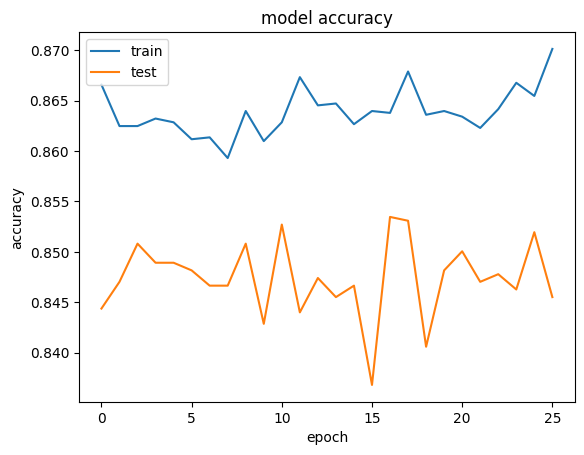

In [66]:
 # summarize history for accuarct
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

In [67]:
#prediction for test data
y_predict=classifier.predict(X_test)
y_predict=(y_predict>0.5)  # y_predict>0.5  then 1 else 0

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [68]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_predict)
cm

array([[1558,   37],
       [ 232,  173]])

In [69]:
# calculate the accuarcy
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test,y_predict)
score

0.8655